In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import sys
import numpy as np
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from echolens import simulation

In [3]:
folder = '/pscratch/sd/l/lonappan/ECHOLENS'
model = ['d0','s0']
nside = 1024

In [4]:
sky = simulation.CMBbharatSky(folder,nside,model,inc_fg=False)

In [8]:
for i in range(100):
    alm,noise = sky.observed_cmb_alms(i)

alm2lenmap: using 256 nthreads
  build angles <- synthesis (GRAD_ONLY):  [0:00:00.824042] (27.7%)  
  build angles <- th-phi-gm (ducc)     :  [0:00:00.016062] (0.5%)  
  build_angles                         :  [0:00:00.840128] (28.3%)  
  synthesis general (STANDARD)         :  [0:00:00.898951] (30.2%)  
  gclm2lenmap                          :  [0:00:02.889941] (97.2%)  
  synthesis general (GRAD_ONLY)        :  [0:00:01.144979] (38.5%)  
  polrot (ducc)                        :  [0:00:00.005828] (0.2%)  
  Total                                :  [0:00:02.971867] d:h:m:s:mus


In [6]:
cmbspectra = simulation.CMBspectra()
cl_len = cmbspectra.get_lensed_spectra(dl=False)

Text(0.5, 1.0, 'Harmonic ILC results')

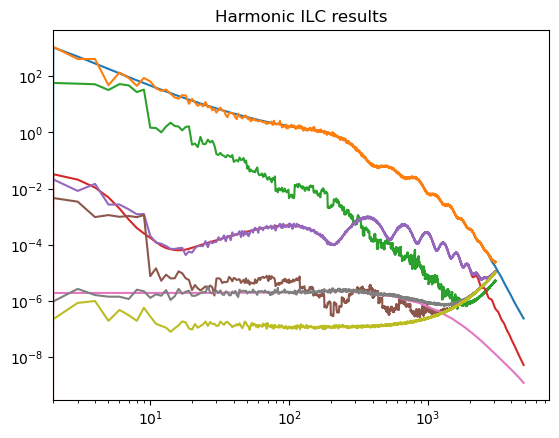

In [7]:
plt.loglog(cl_len['tt'])
plt.loglog(hp.alm2cl(alm[0]))
plt.loglog(hp.alm2cl(noise[0]))
plt.loglog(cl_len['ee'])
plt.loglog(hp.alm2cl(alm[1]))
plt.loglog(hp.alm2cl(noise[1]))
plt.loglog(cl_len['bb'])
plt.loglog(hp.alm2cl(alm[2]))
plt.loglog(hp.alm2cl(noise[2]))
plt.xlim(2,None)
plt.title('Harmonic ILC results')
